In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read data
uk_data_filename = "ar-2010-2014-xlsb.csv"
data = pd.read_csv(uk_data_filename, error_bad_lines=False, sep=';', low_memory=False)



In [3]:
pd.DataFrame(data.columns).to_csv("UK_database_columns.csv", sep="\t")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337109 entries, 0 to 337108
Data columns (total 96 columns):
Patient Age at Treatment                                                    337109 non-null object
Date patient started trying to become pregnant OR date of last pregnancy    12274 non-null float64
Total Number of Previous cycles, Both IVF and DI                            337109 non-null object
Total Number of Previous treatments, Both IVF and DI at clinic              337109 non-null object
Total Number of Previous IVF cycles                                         337109 non-null object
Total Number of Previous DI cycles                                          337109 non-null object
Total number of previous pregnancies, Both IVF and DI                       337109 non-null object
Total number of IVF pregnancies                                             337109 non-null int64
Total number of DI pregnancies                                              337109 non-null int64


In [46]:
data.describe()

,Date patient started trying to become pregnant OR date of last pregnancy,Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF,Total number of live births - conceived through DI,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,...,Number of foetal sacs with fetal pulsation,Heart One Delivery Date,Heart One Birth Congenital Abnormalities,Heart Two Delivery Date,Heart Two Birth Congenital Abnormalities,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities,IVF
count,12274.000000,337109.000000,337109.000000,337109.000000,337109.000000,337109.000000,337109.000000,337109.000000,337109.000000,337109.000000,...,337109.000000,79470.000000,0.0,14589.000000,0.0,376.000000,0.0,2.000000,0.0,337109.0
mean,9.081310,0.172294,0.013512,0.120305,0.010145,0.030693,0.012450,0.028460,0.013020,0.032948,...,0.325206,2012.767975,NaN,2012.589348,NaN,2012.510638,NaN,2012.500000,NaN,1.0
std,3.482784,0.432824,0.134048,0.344512,0.110971,0.172486,0.110883,0.166282,0.113358,0.178500,...,0.568116,5.300072,NaN,1.501046,NaN,1.469655,NaN,0.707107,NaN,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,999.000000,NaN,2001.000000,NaN,2010.000000,NaN,2012.000000,NaN,1.0
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2012.000000,NaN,2011.000000,NaN,2011.000000,NaN,2012.250000,NaN,1.0
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2013.000000,NaN,2013.000000,NaN,2012.000000,NaN,2012.500000,NaN,1.0
75%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2014.000000,NaN,2014.000000,NaN,2014.000000,NaN,2012.750000,NaN,1.0
max,20.000000,5.000000,5.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,2016.000000,NaN,2016.000000,NaN,2015.000000,NaN,2013.000000,NaN,1.0


In [3]:
# cleaning data
data[u'Live Birth Occurrence'].fillna(0,inplace=True)
data["IVF"]= 1

Live Birth Occurrence Patient Age at Treatment  success_rate
0                                      18 - 34      0.422090
1                                        35-37      0.351441
2                                        38-39      0.250800
3                                        40-42      0.165574
4                                        43-44      0.116103
5                                        45-50      0.190808
6                                          999           NaN


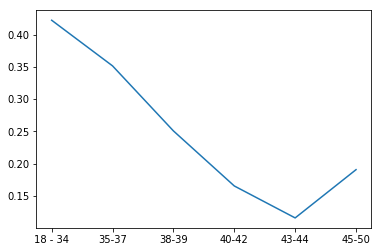

In [48]:
# correlation success and age
data_age = data.groupby([u'Patient Age at Treatment',u'Live Birth Occurrence'])["IVF"].sum().reset_index()
data_age = data_age.pivot(index= u'Patient Age at Treatment', columns=u'Live Birth Occurrence', values='IVF').reset_index()
data_age["success_rate"]= data_age[1.0] / data_age["0.0"]

print(data_age[[u'Patient Age at Treatment',"success_rate"]])
plt.plot(data_age["Patient Age at Treatment"], data_age["success_rate"])  
plt.show()

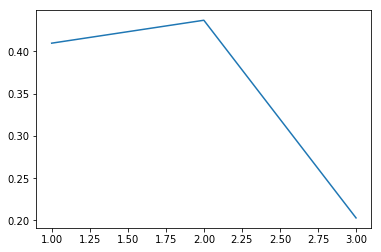

Live Birth Occurrence,Embryos Transfered,success_rate,nb_ivf
0,1.0,0.409773,107319
1,2.0,0.436908,149299
2,3.0,0.202979,9933


In [60]:
# correlation success and embryos transfered
data_embryo_transfered = data.groupby([u'Embryos Transfered',u'Live Birth Occurrence'])["IVF"].sum().reset_index()
data_embryo_transfered = data_embryo_transfered[data_embryo_transfered[u'Embryos Transfered'] > 0]
data_embryo_transfered = data_embryo_transfered.pivot(index= u'Embryos Transfered', columns=u'Live Birth Occurrence', values='IVF').reset_index()
data_embryo_transfered["success_rate"]= data_embryo_transfered[1.0] / data_embryo_transfered["0.0"]
data_embryo_transfered["nb_ivf"] = data_embryo_transfered[1.0] + data_embryo_transfered["0.0"]

plt.plot(data_embryo_transfered["Embryos Transfered"], data_embryo_transfered["success_rate"])  
plt.show()
data_embryo_transfered[[u'Embryos Transfered',"success_rate","nb_ivf"]]

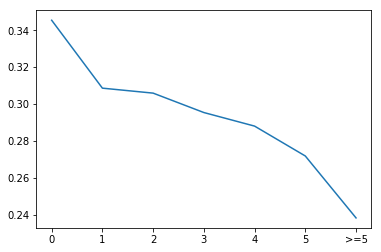

Live Birth Occurrence,"Total Number of Previous cycles, Both IVF and DI",success_rate,nb_ivf
0,0,0.345371,138214
1,1,0.308636,84407
2,2,0.305948,49310
3,3,0.295449,27299
4,4,0.288110,15438
5,5,0.271944,8854
6,>=5,0.238447,13587


In [59]:
# correlation success and nb of previous cycles
data_embryo_transfered = data.groupby([u'Total Number of Previous cycles, Both IVF and DI',u'Live Birth Occurrence'])["IVF"].sum().reset_index()
#data_embryo_transfered = data_embryo_transfered[data_embryo_transfered[u'Embryos Transfered'] > 0]
data_embryo_transfered = data_embryo_transfered.pivot(index= u'Total Number of Previous cycles, Both IVF and DI', columns=u'Live Birth Occurrence', values='IVF').reset_index()
data_embryo_transfered["success_rate"]= data_embryo_transfered[1.0] / data_embryo_transfered["0.0"]
data_embryo_transfered["nb_ivf"] = data_embryo_transfered[1.0] + data_embryo_transfered["0.0"]

plt.plot(data_embryo_transfered["Total Number of Previous cycles, Both IVF and DI"], data_embryo_transfered["success_rate"])  
plt.show()
data_embryo_transfered[[u'Total Number of Previous cycles, Both IVF and DI',"success_rate","nb_ivf"]]


In [59]:
cor = data.groupby(["Egg Source"])["IVF","Live Birth Occurrence"].sum().reset_index()
cor["success"]= cor["Live Birth Occurrence"] / cor["IVF"]
cor

,Egg Source,IVF,Live Birth Occurrence,success
0,Donor,14183,4429.0,0.312275
1,Patient,301069,73866.0,0.245346


In [38]:
# One-hot encode the data using pandas get_dummies
data_prep = data.fillna(0)
columns_to_keep= ['Live Birth Occurrence','Embryos (from Eggs Micro-injected) Stored For Use By Patient','Embryos Stored For Use By Patient','Embryos Transfered from Eggs Micro-injected','Embryos Transfered','Total Embryos Thawed','Embryos from Eggs Micro-injected','Eggs Micro-injected','Total Embryos Created','Eggs Mixed With Donor sperm','Eggs Mixed With Partner Sperm','Total Eggs Mixed','Fresh Eggs Stored','Fresh Eggs Collected','Eggs Thawed','Frozen Cycle','Fresh Cycle','Sperm From','Egg Source','Elective Single Embryo Transfer','PGS Treatment','PGS','PGD treatment','PGD','Specific treatment type','Type of treatment - IVF or DI','Patient acting as Surrogate','Donated embryo','Sperm Donor Age at Registration','Egg Donor Age at Registration','Type of Ovulation Induction','Stimulation used','Main Reason for Producing Embroys Storing Eggs','Cause of Infertility -  Partner Sperm Immunological factors','Causes of Infertility - Partner Sperm Motility','Cause of Infertility -  Partner Sperm Morphology','Cause of Infertility - Partner Sperm Concentration','Cause of Infertility - Female Factors','Cause of Infertility - Cervical factors','Cause of Infertility - Endometriosis','Cause of Infertility - Patient Unexplained','Cause of Infertility - Male Factor','Cause of Infertility - Ovulatory Disorder','Cause  of Infertility - Tubal disease','Type of Infertility -Couple Secondary','Type of Infertility -Couple Primary','Type of Infertility - Male Secondary','Type of Infertility - Male Primary','Type of Infertility - Female Secondary','Type of Infertility - Female Primary','Total number of live births - conceived through DI','Total number of live births - conceived through IVF','Total number of live births - conceived through IVF or DI','Total number of DI pregnancies','Total number of IVF pregnancies','Total number of previous pregnancies, Both IVF and DI','Total Number of Previous DI cycles','Total Number of Previous IVF cycles','Total Number of Previous treatments, Both IVF and DI at clinic','Total Number of Previous cycles, Both IVF and DI','Date patient started trying to become pregnant OR date of last pregnancy','Patient Age at Treatment']
columns_to_keep_epure= ['Live Birth Occurrence','Frozen Cycle','Fresh Cycle','Sperm From','Egg Source','Type of treatment - IVF or DI',
                        'Sperm Donor Age at Registration','Egg Donor Age at Registration','Stimulation used','Cause of Infertility -  Partner Sperm Immunological factors','Causes of Infertility - Partner Sperm Motility','Cause of Infertility -  Partner Sperm Morphology','Cause of Infertility - Partner Sperm Concentration','Cause of Infertility - Female Factors','Cause of Infertility - Cervical factors','Cause of Infertility - Endometriosis','Cause of Infertility - Patient Unexplained','Cause of Infertility - Male Factor','Cause of Infertility - Ovulatory Disorder','Cause  of Infertility - Tubal disease','Type of Infertility -Couple Secondary','Type of Infertility -Couple Primary','Type of Infertility - Male Secondary','Type of Infertility - Male Primary','Type of Infertility - Female Secondary','Type of Infertility - Female Primary','Total number of live births - conceived through IVF or DI','Total number of previous pregnancies, Both IVF and DI','Total Number of Previous cycles, Both IVF and DI','Date patient started trying to become pregnant OR date of last pregnancy','Patient Age at Treatment']
data_prep = data_prep[columns_to_keep_epure]
data_prep.replace(["> 50",'>=5'],[60,6], inplace=True)
data_prep["Patient Age at Treatment"].replace(["18 - 34",'35-37','38-39','40-42','43-44','45-50',999],[1,2,3,4,5,6,7], inplace=True)
data_prep["Egg Donor Age at Registration"].replace(["<= 20","Between 21 and 25","Between 26 and 30","Between 31 and 35",999],[1,2,3,4,2.5],inplace=True)
data_prep["Sperm Donor Age at Registration"].replace(["<= 20","Between 21 and 25","Between 26 and 30","Between 31 and 35","Between 36 and 40","Between 41 and 45",999],[1,2,3,4,5,6,3.5],inplace=True)
#data_prep["Eggs Mixed With Partner Sperm"] = data_prep["Eggs Mixed With Partner Sperm"].astype(int)
#data_prep["Total Embryos Created"] = data_prep["Total Embryos Created"].astype(int)
#data_prep["Eggs Micro-injected"] = data_prep["Eggs Micro-injected"].astype(int)
#data_prep["Embryos Stored For Use By Patient"] = data_prep["Embryos Stored For Use By Patient"].astype(int)
#data_prep["Embryos (from Eggs Micro-injected) Stored For Use By Patient"] = data_prep["Embryos (from Eggs Micro-injected) Stored For Use By Patient"].astype(int)
#data_prep["Fresh Eggs Collected"] = data_prep["Fresh Eggs Collected"].astype(int)
#data_prep["Fresh Eggs Stored"] = data_prep["Fresh Eggs Stored"].astype(int)
#data_prep["Total Number of Previous IVF cycles"] = data_prep["Total Number of Previous IVF cycles"].astype(int)
#data_prep["Total Number of Previous DI cycles"] = data_prep["Total Number of Previous DI cycles"].astype(int)
data_prep["Total number of live births - conceived through IVF or DI"] = data_prep["Total number of live births - conceived through IVF or DI"].astype(int)
data_prep["Patient Age at Treatment"] = data_prep["Patient Age at Treatment"].astype(int)
data_prep["Egg Donor Age at Registration"] = data_prep["Egg Donor Age at Registration"].astype(int)
data_prep["Sperm Donor Age at Registration"] = data_prep["Sperm Donor Age at Registration"].astype(int)
#data_prep["Total Number of Previous treatments, Both IVF and DI at clinic"] = data_prep["Total Number of Previous treatments, Both IVF and DI at clinic"].astype(int)
data_prep["Total Number of Previous cycles, Both IVF and DI"] = data_prep["Total Number of Previous cycles, Both IVF and DI"].astype(int)
data_prep["Total number of previous pregnancies, Both IVF and DI"] = data_prep["Total number of previous pregnancies, Both IVF and DI"].astype(int)
#data_prep["Total Eggs Mixed"] = data_prep["Total Eggs Mixed"].astype(int)

data_prep = pd.get_dummies(data_prep)
# Display the first 5 rows of the last 12 columns


#data_prep.drop([
#    u'Date patient started trying to become pregnant OR date of last pregnancy',
#    u'Donated embryo',
#    u'Patient acting as Surrogate',
#    u'PGD',
#    u'PGD treatment',
#    u'PGS',
#    u'PGS Treatment',
#    u'Elective Single Embryo Transfer',
#    u'Fresh Cycle'
#    ],axis=1,inplace=True)
data_prep.iloc[:,:].head(5)

,Live Birth Occurrence,Frozen Cycle,Fresh Cycle,Sperm Donor Age at Registration,Egg Donor Age at Registration,Stimulation used,Cause of Infertility - Partner Sperm Immunological factors,Causes of Infertility - Partner Sperm Motility,Cause of Infertility - Partner Sperm Morphology,Cause of Infertility - Partner Sperm Concentration,...,Patient Age at Treatment,Sperm From_Donor,Sperm From_Partner,Sperm From_Partner & Donor,Sperm From_not assigned,Egg Source_0,Egg Source_Donor,Egg Source_Patient,Type of treatment - IVF or DI_DI,Type of treatment - IVF or DI_IVF
0,1.0,0.0,0.0,3,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,6,0,0,0,0,0,0,...,2,1,0,0,0,1,0,0,1,0
2,1.0,0.0,0.0,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0.0,0.0,0.0,4,0,1,0,0,0,0,...,3,1,0,0,0,1,0,0,1,0
4,0.0,0.0,0.0,3,0,1,0,0,0,0,...,2,1,0,0,0,1,0,0,1,0


In [53]:
data_prep.corr().reset_index().sort_values(by=['Live Birth Occurrence'],ascending=False).to_csv('matrix_correlation.csv')

In [39]:
# Labels are the values we want to predict
labels = np.array(data_prep[u'Live Birth Occurrence'])
labels

# Remove the labels from the features
features= data_prep.drop(u'Live Birth Occurrence', axis = 1)
features

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
features

array([[0., 0., 3., ..., 0., 1., 0.],
       [0., 0., 6., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 3., ..., 0., 1., 0.],
       [0., 0., 2., ..., 0., 1., 0.],
       [0., 0., 4., ..., 0., 1., 0.]])

In [40]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)




In [41]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (252831, 36))
('Training Labels Shape:', (252831,))
('Testing Features Shape:', (84278, 36))
('Testing Labels Shape:', (84278,))


In [23]:
train_features

array([[2., 2., 1., ..., 0., 0., 0.],
       [0., 6., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [43]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4))

('Mean Absolute Error:', 0.3495)


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [46]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

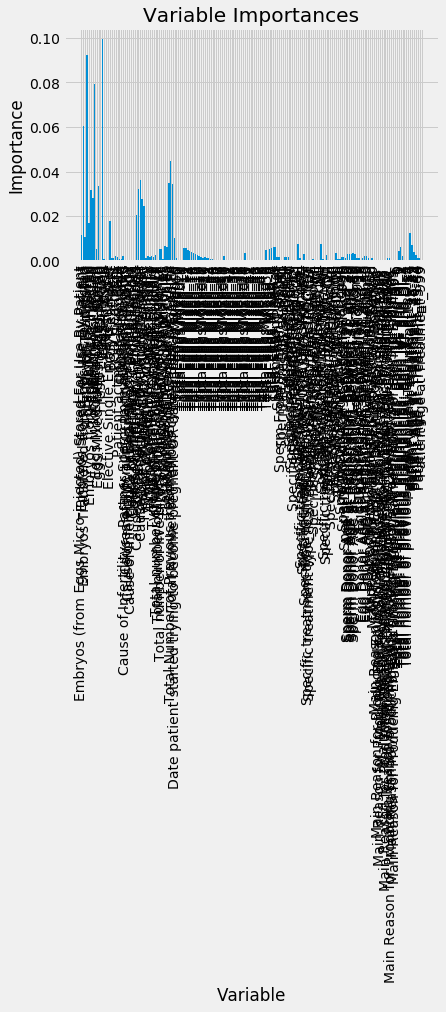

In [14]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [47]:
matrix_feature_importance = pd.DataFrame(
    {'feature_list': feature_list,
     'importances': importances,
    })
matrix_feature_importance.to_csv('matrix_important_features.csv')
matrix_feature_importance.sort_values(by=['importances'],ascending=False)

,feature_list,importances
26,Patient Age at Treatment,0.210079
24,"Total Number of Previous cycles, Both IVF and DI",0.151212
25,Date patient started trying to become pregnant...,0.077957
2,Sperm Donor Age at Registration,0.074827
13,Cause of Infertility - Male Factor,0.052468
23,"Total number of previous pregnancies, Both IVF...",0.050732
14,Cause of Infertility - Ovulatory Disorder,0.036875
22,Total number of live births - conceived throug...,0.035012
12,Cause of Infertility - Patient Unexplained,0.034222
15,Cause of Infertility - Tubal disease,0.033100


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')